# 人工知能のための数学最終レポート

*M21W0B09_入谷雄介*

***
## コンセプト
自宅の家賃が妥当なのかどうか調査するため、最寄り駅の賃貸物件の家賃から学習モデルを作成。<br>
散布図と線形回帰のプロットに自宅を被せて表示するプログラムを作成。<br>
基本的には「人工知能のための数学」の講義内で教授された記法を使う。

***
## 仮説
賃貸サイトを見ている限りでは割安であると予想している。

In [75]:
import numpy as np
import matplotlib.pyplot as plt


#### 賃貸住宅の基礎データ
※横軸 = (駅徒歩 / 2) + 築年数<br>

In [76]:
def generatePredictModel():
    with open('house_price.csv', 'r') as fd:
        feature_names = np.array(fd.read().split('\n')[0].split(','))

    csv_data = np.loadtxt('house_price.csv', delimiter=',', skiprows=1)

    learning_data = csv_data[:, np.logical_or(feature_names == 'FarFromStation', feature_names == 'Age')]
    learning_data = np.array([i[0] / 2 + i[1] for i in learning_data])

    true_data = csv_data[:, feature_names == 'TotalPrice']
    true_data = np.array([i[0] for i in true_data])

    return learning_data, true_data

In [77]:
# 駅徒歩 + 築年数　と　家賃を返してもらう
x1, yt = generatePredictModel()

x_mean = np.mean(x1)
x_std = np.std(x1)

x3 = (x1 - x_mean) / x_std

In [78]:
x_org = np.reshape(x3, (-1,1))
x = np.insert(x_org, 0, 1.0, axis=1)
print(x[:10])

[[ 1.          2.02520744]
 [ 1.         -0.46561887]
 [ 1.         -1.43427354]
 [ 1.         -2.05698012]
 [ 1.         -0.67318773]
 [ 1.         -1.08832545]
 [ 1.         -0.67318773]
 [ 1.         -0.18886039]
 [ 1.          0.71060466]
 [ 1.         -0.05048115]]


#### 予測関数predの定義

In [79]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)


In [80]:
# 初期化処理

# データ系列総数
# 次の行を正しく実装します
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
# 次の行を正しく実装します
D = x.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.1

In [81]:
# 重みベクトルの初期値 (すべての値を1にする)
# 次の行を正しく実装します
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
# 次の行を正しく実装します
history = np.zeros((0,2))

In [82]:

# 繰り返しループ

for k in range(iters+1):

    # 予測値の計算 (7.8.1)
    yp = pred(x, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if k % 100 == 0:
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        # print( "iter = %d  loss = %f" % (k, loss), w)


In [83]:
# 予測値、正解値、誤差の表示(最初の10要素)

print('予測値:', yp[:10])
print('実測値', yt[:10])
print('誤差', yd[:10])


予測値: [6.24535807 8.09444107 8.8135289  9.27579965 8.24853132 8.55671182
 8.24853132 7.8889874  7.22126299 7.78626057]
実測値 [8.8  8.7  7.6  7.7  8.   9.85 7.3  6.8  8.2  7.5 ]
誤差 [-2.55464193 -0.60555893  1.2135289   1.57579965  0.24853132 -1.29328818
  0.94853132  1.0889874  -0.97873701  0.28626057]


#### プロット表示

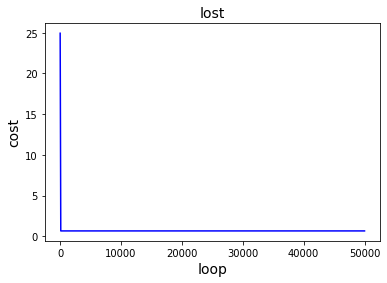

In [84]:
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('loop', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('lost', fontsize=14)
plt.show()